经过图像增加技术可以解决学习过程过拟合。初步的想法是在外层构建一个aug dataloader，这样一张图片经过图片增广技术，变成多个样本。通过dataloader封装

In [1]:
%matplotlib inline
import sys
import math
from functools import reduce

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [2]:
train_samples = datasets.FashionMNIST('data/', train=True, download=False, transform=transforms.ToTensor())
train_loader  = torch.utils.data.DataLoader(train_samples, batch_size=2, shuffle=False)

torch.Size([4, 1, 28, 28])


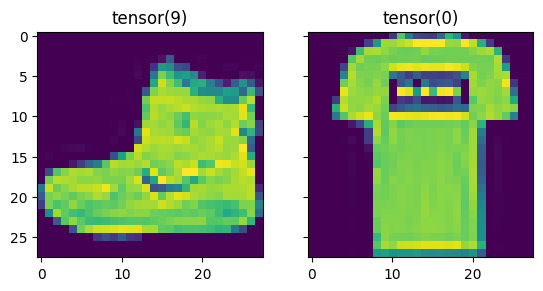

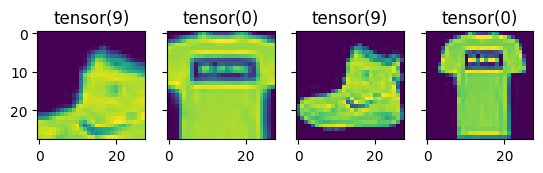

In [3]:
from utils import show_images, _show_tensor_imgs

loader_i = iter(train_loader)
imgs, labels = next(loader_i)
_show_tensor_imgs(imgs, labels)

imgs_ = transforms.Compose((transforms.RandomResizedCrop(28), ))(imgs)

imgs = torch.cat((imgs_, imgs), 0)
print(imgs.shape)
_show_tensor_imgs(imgs, torch.cat((labels, labels)))


torch.Size([46, 1, 28, 28]) , torch.Size([46])


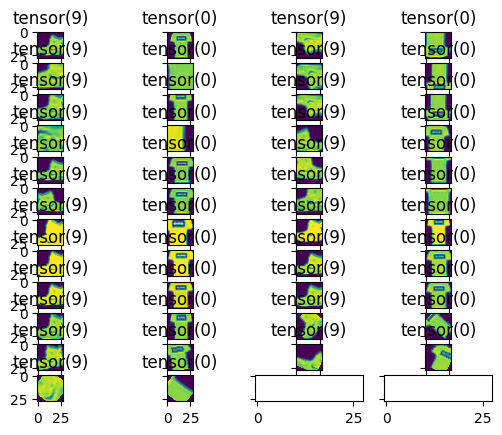

In [4]:

from utils import ImageAugumentsLoader

aug_loader = ImageAugumentsLoader(train_loader)
add_aug = lambda sub_trans, multi : aug_loader.add_trans(transforms.Compose((transforms.RandomResizedCrop(28), sub_trans)), multi)
add_aug(transforms.RandomVerticalFlip(), 2)
add_aug(transforms.RandomVerticalFlip(), 4)
add_aug(transforms.RandomHorizontalFlip(), 4)
add_aug(transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5), 8)
add_aug(transforms.RandomRotation(degrees=90), 4)

i = iter(aug_loader)
batch = next(i)
print(f'{batch[0].shape} , {batch[1].shape}')
_show_tensor_imgs(batch[0], batch[1])

